# Project 1: Pandas Data Analysis

1. Introduction
    * initial setup
2. Loading Data
    * NumPy array
    * `read_csv`
3. Modifying Data
    * Selecting Data
4. Pandas DataStructures
    * One-Dimensional Series
        * Selecting columns
    * Two-Dimensional DataFrames
        * Slicing rows
6. Applications in Data Analysis
    * Plots
        * Visualizing Data
    * Calculations
        * Computational Tools
            * Creating Functions

## 1. Introduction


    
Pandas is a powerful data analysis tool in Python package, which was started by Wes McKinney in 2009. It is flexible and provide fast datastructure which also works well for real world analysis. Some data that pandas works well for includes any form of observational and statstical data sets. Pandas is built on top of NumPY.

### Initial Setup

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## 2. Loading Data

There are different ways to import data.

### Creating DataFrame using NumPy

A NumPy array is one of the many ways that can be served as an input to the **DataFrame**.

For example:

First we create a table with column names ' ' , '`Column1`' , '`Column2`', '`Column3`' and with row names '`Row1`', '`Row2`','`Row3`'. This data is created with numpy array list to differentiate the different rows and columns.

In [2]:
my_data = np.array([['','Column1','Column2','Column2'],
                ['Row1',1,2,3],
                ['Row2',4,5,6]])
my_data

array([['', 'Column1', 'Column2', 'Column2'],
       ['Row1', '1', '2', '3'],
       ['Row2', '4', '5', '6']], 
      dtype='<U7')

In order to display our numpy array list as an actual table, we have to use the `pd.DataFrame` function.

We can type in `pd.DataFrame?` to read its docstrings and what the parameters are.

In [3]:
pd.DataFrame?

The following are the parameters of `pd.DataFrame`:
 * `data`
 * `index`
 * `columns`
 * `dtype`
 * `copy`

In [4]:
print(pd.DataFrame(data = my_data[1:,1:],
                  index = my_data[1:,0],
                  columns = my_data [0,1:]))

     Column1 Column2 Column2
Row1       1       2       3
Row2       4       5       6


Or we can load **csv data files** using the pandas function `pd.read_csv` or `pd.read_table`, where they both use the same parsing code to convert data into a DataFrame object. 

### Loading csv data files

#### What is a csv data file?

CSV files are comma separated files that are allowed to be saved into a table structure. 

Please read more here : [bigcommerce-csvfiles](https://support.bigcommerce.com/articles/Public/What-is-a-CSV-file-and-how-do-I-save-my-spreadsheet-as-one)

In [5]:
pd.read_csv?

The following are some parameters of `pd.read_csv`:
 * sep
 * delimiter
 * header
 * engine
 * index_col
 * names
 * index_col
 * usecols
 * and many more

Please read more here: [Pandas Parameters](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)



Using the data that was provided to us in Stat 306: (There is a password to this website so I will not provide it)

So first we can enter the data in excel notebook, then we can download as a csv file. After downloading, we will upload to jupyter notebook as csv file. Then we can call `pd.read_csv` as the following:

Note: The following data is from Stat 306, which is password-protected.

In [59]:
# Reading the csv data
cig_data  = pd.read_csv('cigarette.csv', index_col = 0, engine ='c', sep = ',')
cig_data

,tar,nicot,weight,CO
brand,,,,
alpine,14.1,0.86,0.9853,13.6
benson_hedges,16.0,1.06,1.0938,16.6
bull_durham,29.8,2.03,1.1650,23.5
camel_lights,8.0,0.67,0.9280,10.2
carlton,4.1,0.40,0.9262,5.4
chesterfield,15.0,1.04,0.8885,15.0
golden_lights,8.8,0.76,1.0267,9.0
kent,12.4,0.95,0.9225,12.3
kool,16.6,1.12,0.9372,16.3


index_col = 0: make the first column the index column

## 3. Modifying Data

### Selecting Data

We can modify our data by selecting various columns from our DataFrame.

Remember that we always start counting from 0,1,2,...

####  Examples



We can select rows up to and including the 1st row from the DataFrame (including all the columns):

In [4]:
# Selecting various rows
cig_data[:1]

,tar,nicot,weight,CO
brand,,,,
alpine,14.1,0.86,0.9853,13.6


We can select rows up to and including the 2nd row from the DataFrame (including all the columns):

In [5]:
# selecting rows up to and including the 2nd row
cig_data[:2]

,tar,nicot,weight,CO
brand,,,,
alpine,14.1,0.86,0.9853,13.6
benson_hedges,16.0,1.06,1.0938,16.6


We can also select columns by typing the column names in single quotation marks in a numpy list, then we can select the rows we are interested in:

In [10]:
# Selecting various columns and rows
cig_data[['nicot','tar']][:2]

,nicot,tar
brand,,
alpine,0.86,14.1
benson_hedges,1.06,16.0


Please note that we can also count the number of times the value that we are interested in have occured, which in the cigarette case it's not very helpul.
(Side note: Maybe we should worry about the range of tar content for all the cigarette brands instead).

In [14]:
# Counting repeated values
cig_data['tar'].value_counts()

8.6     1
29.8    1
8.0     1
15.0    1
9.0     1
1.0     1
14.9    1
17.0    1
15.8    1
4.5     1
14.5    1
14.1    1
12.8    1
13.7    1
15.2    1
12.0    1
15.1    1
16.6    1
11.4    1
7.8     1
4.1     1
8.8     1
12.4    1
7.3     1
16.0    1
Name: tar, dtype: int64

In [15]:
tar_counts = cig_data['tar'].value_counts()

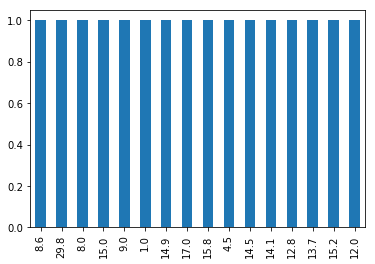

In [16]:
tar_counts[:12].plot(kind='bar')

As you can see, the plot of repition of tar contents in the cigarette brands is not so interesting regarding to their exact values. 

## 4. Pandas DataStructures

### One-Dimensional Series

Series is a one-dimensional labeled array that can hold any data types such as 
 * integers
 * floats
 * strings
 * Python objects
 * and many more
 
The docstrings of `pd.Series` tells us that it is a one-dimensional ndarray with axis labels.

The parameters of `pd.Series` includes:
 * data
 * index
 * dtype
 * copy
 * and etc

The parameters that we mainly use are `data` and `index`, where data is the data we are trying to display (whether it was integers or strings etc) and index is the name we give to the individual data.

Note that the number of items in the `index` should match the number of items in the `data`.
Let's try a simple example of creating a Series.

In [62]:
# Creating a randomly made-up Series 
s = pd.Series([1,2,3], index =['one','two','three'])
s

one      1
two      2
three    3
dtype: int64

Series is very much like `ndarray`. We can convert series into a NumPy array by calling the command as follows:

In [65]:
s.values?

In [66]:
#Return Series as ndarray or ndarray-like
s.values

array([1, 2, 3])

In [69]:
# Show the index of the Series
s.index

Index(['one', 'two', 'three'], dtype='object')

We can also create a Series with random numbers using `np.random.randn()` from NumPy package.

In [20]:
pd.Series(np.random.randn(3))

0    1.031365
1   -0.491805
2    0.104318
dtype: float64

In order to extract a series from our DataFrame `cig_data`, we can extract/select a column name with single-quotation marks:

In [70]:
# Extracting certain category
cig_data_SeriesCO = cig_data['CO']

In [17]:
cig_data_SeriesCO

brand
alpine             13.6
benson_hedges      16.6
bull_durham        23.5
camel_lights       10.2
carlton             5.4
chesterfield       15.0
golden_lights       9.0
kent               12.3
kool               16.3
L_and_M            15.4
lark_lights        13.0
marlboro           14.4
merit              10.0
multifilter        10.2
newporrt_lights     9.5
now                 1.5
old_gold           18.5
pall_mall_light    12.6
raleigh            17.5
salem_ultra         4.9
tareyton           15.9
TRUE                8.5
viceroy_rich       10.6
virginia_slims     13.9
winston_lights     14.9
Name: CO, dtype: float64

In [22]:
# Check the datatype of the column
type(cig_data_SeriesCO)

pandas.core.series.Series

In [23]:
# To show the shape of the data we selected (number of rows and columns)
cig_data_SeriesCO.shape

(25,)

In [24]:
# Show the type of Series we selected (which is a float in this case)
cig_data_SeriesCO.dtype

dtype('float64')

In [25]:
# We can display all the data in the Series that exceeds the median of the Series
cig_data_SeriesCO[cig_data_SeriesCO > cig_data_SeriesCO.median()]

brand
alpine            13.6
benson_hedges     16.6
bull_durham       23.5
chesterfield      15.0
kool              16.3
L_and_M           15.4
marlboro          14.4
old_gold          18.5
raleigh           17.5
tareyton          15.9
virginia_slims    13.9
winston_lights    14.9
Name: CO, dtype: float64

In [26]:
# We can also convert all data into their exponents using the NumPy function
np.exp(cig_data_SeriesCO)

brand
alpine             8.061298e+05
benson_hedges      1.619155e+07
bull_durham        1.606646e+10
camel_lights       2.690319e+04
carlton            2.214064e+02
chesterfield       3.269017e+06
golden_lights      8.103084e+03
kent               2.196960e+05
kool               1.199499e+07
L_and_M            4.876801e+06
lark_lights        4.424134e+05
marlboro           1.794075e+06
merit              2.202647e+04
multifilter        2.690319e+04
newporrt_lights    1.335973e+04
now                4.481689e+00
old_gold           1.082550e+08
pall_mall_light    2.965586e+05
raleigh            3.982478e+07
salem_ultra        1.342898e+02
tareyton           8.040485e+06
TRUE               4.914769e+03
viceroy_rich       4.013484e+04
virginia_slims     1.088161e+06
winston_lights     2.957929e+06
Name: CO, dtype: float64

In [27]:
# We can also display certain data that we are interested in by picking their indexes
cig_data_SeriesCO[[1,2,3]]

brand
benson_hedges    16.6
bull_durham      23.5
camel_lights     10.2
Name: CO, dtype: float64

A key difference between Series and ndarray is that :
 * operations between data in Series are aligned based on the label 
 * we do not need to worry about whether the computations have the same label in Series

In [73]:
cig_data_SeriesCO[1:] + cig_data_SeriesCO[:-1]

brand
L_and_M            30.8
TRUE               17.0
alpine              NaN
benson_hedges      33.2
bull_durham        47.0
camel_lights       20.4
carlton            10.8
chesterfield       30.0
golden_lights      18.0
kent               24.6
kool               32.6
lark_lights        26.0
marlboro           28.8
merit              20.0
multifilter        20.4
newporrt_lights    19.0
now                 3.0
old_gold           37.0
pall_mall_light    25.2
raleigh            35.0
salem_ultra         9.8
tareyton           31.8
viceroy_rich       21.2
virginia_slims     27.8
winston_lights      NaN
Name: CO, dtype: float64

#### Selecting colum:
 * syntax: data[col]
 * result: Series

### Two Dimensional DataFrames

For 2D DataFrames, each column of the DataFrame has its own dtypes, which in `cig_data` example, they are all floats:

In [29]:
cig_data.dtypes

tar       float64
nicot     float64
weight    float64
CO        float64
dtype: object

In order to display all the column names, we call the data `.columns`.

In [30]:
cig_data.columns

Index(['tar', 'nicot', 'weight', 'CO'], dtype='object')

In order to display the index names (row names), we call the data `.index`.

In [31]:
cig_data.index

Index(['alpine', 'benson_hedges', 'bull_durham', 'camel_lights', 'carlton',
       'chesterfield', 'golden_lights', 'kent', 'kool', 'L_and_M',
       'lark_lights', 'marlboro', 'merit', 'multifilter', 'newporrt_lights',
       'now', 'old_gold', 'pall_mall_light', 'raleigh', 'salem_ultra',
       'tareyton', 'TRUE', 'viceroy_rich', 'virginia_slims', 'winston_lights'],
      dtype='object', name='brand')

If you want a general description of your DataFrame, we call the data `.info()`.

In [32]:
cig_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, alpine to winston_lights
Data columns (total 4 columns):
tar       25 non-null float64
nicot     25 non-null float64
weight    25 non-null float64
CO        25 non-null float64
dtypes: float64(4)
memory usage: 1000.0+ bytes


We can also slice certain rows of the Series ndarry-like: 

In [33]:
cig_data_SeriesCO[2:6]

brand
bull_durham     23.5
camel_lights    10.2
carlton          5.4
chesterfield    15.0
Name: CO, dtype: float64

#### Slicing rows:
 * syntax data[2:4]
 * result: DataFrame

## 5. Application in Data Analysis

In this tutorial, we will be discussing time series as an application in data analysis that involves pandas.

We start-off at defining what a time series is:
* Time Series: 
 * A series of data points that are graphed in time order. 
 * A sequence taken at equally spaced discrete points in time

First of all, we will import `datetime` to our notebook. Dates and times can be provided by the `datetime` module in both a simple and complex ways. Please read more at [datetime](https://docs.python.org/2/library/datetime.html). The purpose of the `datetime` module includes the functions for doing time parsing, where we can use it to work with dates and times, both separately and together, which is important for data analysis in time series.
Other modules that are similar to `datetime` includes the `time` and `calendar` modules.

In [34]:
import datetime

For example, we can initialize a time instance as follows, where `times` have attributes for *hour*, *minute*, *second* and *microsecond*.

In [35]:
# The following shows the time as 1 hour 30 minutes 5 seconds and 2 microseconds
t = datetime.time(1,30,5,2)
print(t)

01:30:05.000002


We can call the parameters as follows:

In [43]:
t.hour

1

In [44]:
t.minute

30

In [45]:
t.second

5

In [36]:
t.microsecond

2

Okay, let's get back to the application.

Note: Please read more at [time series](http://wavedatalab.github.io/datawithpython/timeseries.html): this is where I got inspired to do data on Yahoo stocks.

### Plots

In our data, it only includes stock prices from March 18, 2015 to March 18, 2017 where the time in sequence is provided monthly.

Note: The following data that involves Yahoo Stock are from [Yahoo](https://ca.finance.yahoo.com/quote/YHOO/history?period1=1363590000&period2=1426662000&interval=1mo&filter=history&frequency=1mo).

In [38]:
YS1517 = pd.read_csv('yahoostock1517.csv', parse_dates = True, engine ='c',
                     index_col = 0, sep = ',')
YS1517

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-01,45.889999,47.000000,45.389999,46.590000,5595400,46.590000
2017-02-01,44.250000,46.720001,43.560001,45.660000,7393600,45.660000
2017-01-03,39.110001,45.080002,38.639999,44.070000,8554700,44.070000
2016-12-01,41.000000,41.799999,38.240002,38.669998,10912200,38.669998
2016-11-01,41.130001,42.160000,38.869999,41.020000,10192300,41.020000
2016-10-03,42.950001,44.080002,41.169998,41.549999,8704100,41.549999
2016-09-01,42.779999,44.919998,41.849998,43.099998,13472000,43.099998
2016-08-01,38.180000,43.290001,38.099998,42.750000,10369500,42.750000
2016-07-01,37.560001,39.419998,37.060001,38.189999,13611700,38.189999


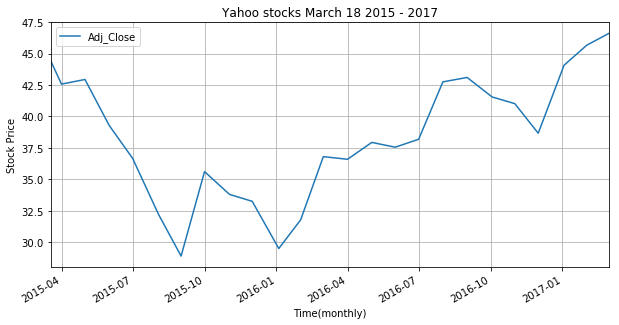

In [39]:
YS1517.Close.plot(figsize = (10,5), label = 'Adj_Close')
plt.title('Yahoo stocks March 18 2015 - 2017')
plt.xlabel('Time(monthly)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show();

We can look at the volumn for the time periods

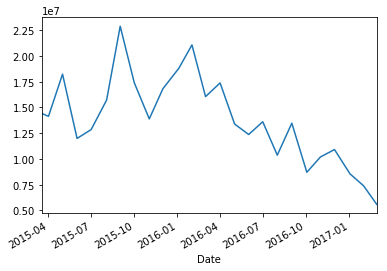

In [40]:
YS1517.Volume.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcacd4b00b8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fcac81da748>], dtype=object)

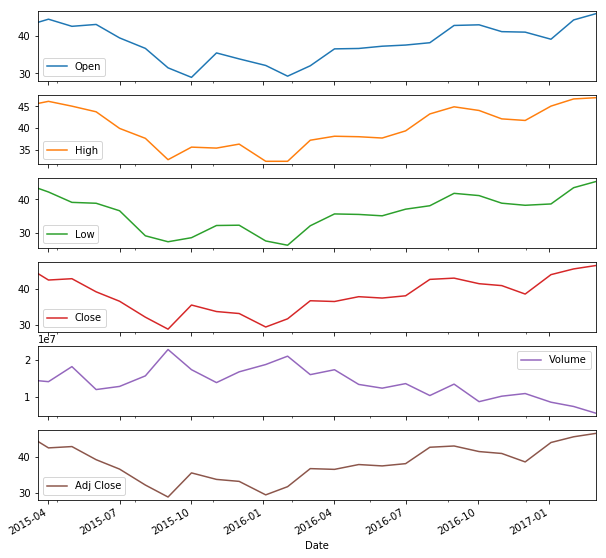

In [111]:
YS1517.plot(subplots = True, figsize=(10,10))

#### Moving Average

A moving average, as known as a rolling average or a running average, is a calculation which is used to analyze data points by creating small subsets of the averages of the original dataset. 

Source: [Wikipedia](https://en.wikipedia.org/wiki/Moving_average)

In [41]:
close_ys = YS1517['Adj Close']
#movingaverage = pd.rolling_mean(close_ys, 20)
close_ys

Date
2017-03-01    46.590000
2017-02-01    45.660000
2017-01-03    44.070000
2016-12-01    38.669998
2016-11-01    41.020000
2016-10-03    41.549999
2016-09-01    43.099998
2016-08-01    42.750000
2016-07-01    38.189999
2016-06-01    37.560001
2016-05-02    37.939999
2016-04-01    36.599998
2016-03-01    36.810001
2016-02-01    31.790001
2016-01-04    29.510000
2015-12-01    33.259998
2015-11-02    33.810001
2015-10-01    35.619999
2015-09-01    28.910000
2015-08-03    32.240002
2015-07-01    36.669998
2015-06-01    39.290001
2015-05-01    42.939999
2015-04-01    42.570000
2015-03-18    44.439999
Name: Adj Close, dtype: float64

In pandas, we can use `pd.rolling().mean` to get the moving average, which is different from previous versions of python.

In [42]:
moving_average = close_ys.rolling(center=False,window=10).mean()
moving_average

Date
2017-03-01          NaN
2017-02-01          NaN
2017-01-03          NaN
2016-12-01          NaN
2016-11-01          NaN
2016-10-03          NaN
2016-09-01          NaN
2016-08-01          NaN
2016-07-01          NaN
2016-06-01    41.915999
2016-05-02    41.050999
2016-04-01    40.144999
2016-03-01    39.418999
2016-02-01    38.731000
2016-01-04    37.580000
2015-12-01    36.751000
2015-11-02    35.822000
2015-10-01    35.109000
2015-09-01    34.181000
2015-08-03    33.649000
2015-07-01    33.522000
2015-06-01    33.791000
2015-05-01    34.404000
2015-04-01    35.482000
2015-03-18    36.975000
Name: Adj Close, dtype: float64

Then we can plot it:

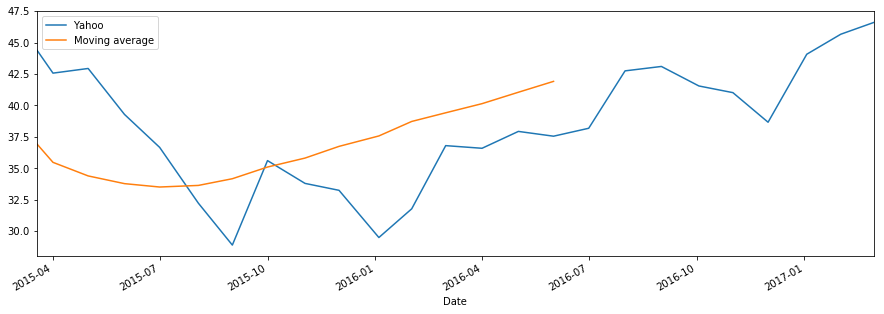

In [43]:
# Labeling the plot
YS1517.Close.plot(label='Yahoo')
# Plot the moving average plot
moving_average.plot(label='Moving average')

plt.legend()
# Customize the size of the plot
plt.gcf().set_size_inches(15,5)

### Other plots

#### Kernel Density Estimation Plot (KDE)

KDE can be used to estimate the probability density function of a random variable in statistics

$$
\hat{f_h} (x) = \frac{1}{n} \sum_{i = 1}^n K_h(x-x_i) = \frac{1}{nh} \sum_{i=1}^n K_h \left( \frac{x-x_i}{h}\right)
$$
 
Source: [Wikipedia](https://en.wikipedia.org/wiki/Kernel_density_estimation)

We can also plot this with pandas:
`Panda.Series.plot(kind = 'kde')`.

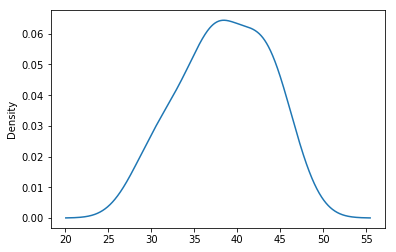

In [44]:
YS1517.Close.plot(kind='kde')

### Calculations

#### Computational Tools

There are many statistical computation tools that can be done with pandas.

Please read more here: [Computational tools](http://pandas.pydata.org/pandas-docs/stable/computation.html).

#### Some basic knowledge

##### Percent Change

`Series` and ` DataFrame` both have a method called `pct_change` which is used to compute the percent change over a given number of periods.

For example, we can create a random DataFrame as follows:

In [46]:
dataframe = pd.DataFrame(np.random.randn(10,5))
dataframe

,0,1,2,3,4
0,0.857251,1.577662,-1.904832,0.007216,-1.706931
1,1.287024,-0.359841,0.086249,-0.744737,-0.392634
2,1.250404,0.438697,-2.245407,0.299637,-2.242804
3,0.076988,-0.233839,1.241716,-0.956453,-0.033833
4,1.178253,0.053777,-0.243006,0.163901,1.659275
5,0.618761,0.431767,-0.211102,-1.179516,0.619935
6,0.838800,-0.065579,-0.630630,-0.000901,0.412926
7,0.773027,1.224873,1.124376,-0.005158,0.057868
8,-0.249546,-0.022563,-1.885427,-0.367285,-1.173697
9,-0.820632,-0.731699,0.455547,1.481665,-0.148701


In [47]:
dataframe.pct_change()

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,0.501339,-1.228085,-1.045279,-104.209972,-0.769977
2,-0.028453,-2.219142,-27.034158,-1.402340,4.712203
3,-0.938429,-1.533029,-1.553002,-4.192037,-0.984915
4,14.304326,-1.229976,-1.195702,-1.171363,-50.043158
5,-0.474849,7.028816,-0.131291,-8.196537,-0.626382
6,0.355613,-1.151885,1.987332,-0.999236,-0.333920
7,-0.078414,-19.677789,-2.782940,4.722238,-0.859860
8,-1.322817,-1.018421,-2.676865,70.211692,-21.282435
9,2.288501,31.428687,-1.241615,-5.034105,-0.873306


##### Covariance

The `Series` object has a method called `cov` which functions to compute the covariance between series. When `NA/null` values are present, the covariance is computed without them.

In [48]:
# First, we can create two random Series:
series1 = pd.Series(np.random.randn(1000))
series2 = pd.Series(np.random.randn(1000))

In [49]:
series1.cov?

In [50]:
# Then we can compute covariance with Series, excluding missing values if present
series1.cov(series2)

0.022512711720114115

Please note that `DataFrame` also has a method called `cov` which functions to compute pairwise covariances among the Series in DataFrame. It also excludes the missing values.

##### Correlation

In statistics, once we know what the covariance of, let's say, two random variables X and Y, we can compute the correlation with this formula (the covariance can be normalized to produce the correlation coefficient):

$$
\rho = \frac{cov(X,Y)}{\sqrt{(var(X)var(Y)}}
$$

Please see: [Wikipedia](https://en.wikipedia.org/wiki/Correlation_coefficient) for more information on corselations.

In Pandas, There are many methods that can be used to compute the correlation:

* *Pearson (default)*: `Standard correlation coefficient`
* *Kendall*: `Kendall Tau correlation coefficient`
* *Spearman*: `Spearman rank correlation coefficient`

Back to our application with Yahoo Stocks, we can calculate the correlation between the Yahoo stocks in March 18, 2013-2015 with 2015-2017.

But first, let's import another csv:

In [51]:
YS1315 = pd.read_csv('yahoostocks1315.csv',parse_dates = True,engine ='c',index_col = 0, sep = ',')
YS1315

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-02,44.060001,44.709999,41.970001,44.669998,15079000,44.669998
2015-02-02,44.430000,45.250000,42.540001,44.279999,14482200,44.279999
2015-01-02,50.660000,50.779999,41.799999,43.990002,25550700,43.990002
2014-12-01,51.430000,51.680000,48.290001,50.509998,16338000,50.509998
2014-11-03,46.049999,52.619999,45.740002,51.740002,25212800,51.740002
2014-10-01,40.660000,46.520000,36.200001,46.049999,32909600,46.049999
2014-09-02,38.900002,44.009998,37.900002,40.750000,59553900,40.750000
2014-08-01,35.689999,38.720001,35.150002,38.509998,14516900,38.509998
2014-07-01,35.500000,36.990002,32.930000,35.810001,24392600,35.810001


In [52]:
# Let's say we want to focus on the Adj_Close cateogory:
YS1517['Adj Close'].corr(YS1315['Adj Close'],method = 'pearson')

nan

In [53]:
# Or using the series example, we can compute the correlation between
# Series 1 and Series 2 :
# The default method is pearson
series1.corr(series2, method='pearson')

0.024018225549581041

##### Data Ranking

The `rank` method produces a data ranking which displays the mean of the ties rank data.

In [54]:
YS1517['Adj Close'].rank()

Date
2017-03-01    25.0
2017-02-01    24.0
2017-01-03    22.0
2016-12-01    14.0
2016-11-01    16.0
2016-10-03    17.0
2016-09-01    21.0
2016-08-01    19.0
2016-07-01    13.0
2016-06-01    11.0
2016-05-02    12.0
2016-04-01     8.0
2016-03-01    10.0
2016-02-01     3.0
2016-01-04     2.0
2015-12-01     5.0
2015-11-02     6.0
2015-10-01     7.0
2015-09-01     1.0
2015-08-03     4.0
2015-07-01     9.0
2015-06-01    15.0
2015-05-01    20.0
2015-04-01    18.0
2015-03-18    23.0
Name: Adj Close, dtype: float64

##### Other Common Methods

 * `count()`
 * `sum()`
 * `mean()`
 * `median()`
 * `quantile()`
 * `std()`
 * `var()`
 * and many more

#### Application - Calculation of CAPM model

Note: The following is inspired by [chiwang](https://github.com/chiwang0503/Pandas-Tutorial/blob/master/Project_Pandas_Tutorial.ipynb).

**Captial Asset Pricing Model**

The formula for caluclating the expected return of an asset is:
$$\bar{r_a} = r_f + \beta_a(\bar{r_m} - r_f)$$

where

$\bar{r_f} = \mathrm{Risk \ free \ rate}\\
\beta_a = \mathrm{Beta \ of \ the \ security} \\
\bar{r_m} = \mathrm{Expected \ market \ return}$

The following example is taken from [investopedia](http://www.investopedia.com/terms/c/capm.asp).

"The risk-free rate is 2% and the beta (risk measure) of a stock is 2. The expected market return over the period is 10%, so that means that the market risk premium is 8% (10% - 2%) after subtracting the risk-free rate from the expected market return." 

Read more: Capital Asset Pricing Model - CAPM Definition | Investopedia http://www.investopedia.com/terms/c/capm.asp#ixzz4boRPrXDp 
Follow us: Investopedia on Facebook

Using the formula given above, we can calculate the expected stock return:

$2\% + 2 * (10\%-2\%)$

which is equal to

$18\%$

In order to calculate $\beta_a$, we use the following formula:

$$
\beta = \frac{\mathrm{cov(Stock, Market \ Returns)}}{\mathrm{Variance \ of \ the \ market}}
$$

Some computational tools involves in calculating $\beta$ are:
 * `Series.pct_change()` (or DataFrame)
 * `Series.cov(Series)` (or DataFrame)
 * `Series.var()` (or DataFrame)

In [55]:
def beta(stock,market_returns):
    beta_a = (stock.pct_change()).cov(market_returns.pct_change())/((market_returns.pct_change()).var())
    return float(beta_a)

In [56]:
beta(YS1517['Adj Close'],YS1315['Adj Close'])

nan

In order to calculate the expected return:

In [57]:
def r_a (r_f,b,r_m):
    r_a = r_f + b* (r_m - r_f)
    return r_a

#### Exercise:

The risk-free rate is 2% and the beta (risk measure) of a stock is 2. The expected market return over the period is 10%, so that means that the market risk premium is 8% (10% - 2%) after subtracting the risk-free rate from the expected market return. 

Given that the beta of security is 2, the expected market return rate and the risk free rate are 20% and 5% respectively. Calculate the expected return of the stock.